# <img src="https://img.icons8.com/bubbles/50/000000/mind-map.png" style="height:50px;display:inline"> EE 046211 - Technion - Deep Learning
---

## HW3 - Sequential Tasks and Training Methods
---

### <img src="https://img.icons8.com/clouds/96/000000/keyboard.png" style="height:50px;display:inline"> Keyboard Shortcuts
---
* Run current cell: **Ctrl + Enter**
* Run current cell and move to the next: **Shift + Enter**
* Show lines in a code cell: **Esc + L**
* View function documentation: **Shift + Tab** inside the parenthesis or `help(name_of_module)`
* New cell below: **Esc + B**
* Delete cell: **Esc + D, D** (two D's)

### <img src="https://img.icons8.com/bubbles/50/000000/information.png" style="height:50px;display:inline"> Students Information
---
* Fill in

|Name     |Campus Email| ID  |
|---------|--------------------------------|----------|
|Roy Elkabetz| roy-e@campus.technion.ac.il| 300427259|


### <img src="https://img.icons8.com/bubbles/50/000000/upload-to-cloud.png" style="height:50px;display:inline"> Submission Guidelines
---
* Maximal garde: 100.
* Submission only in **pairs**. 
    * Please make sure you have registered your group in Moodle (there is a group creation component on the Moodle where you need to create your group and assign members).
* **No handwritten submissions.** You can choose whether to answer in a Markdown cell in this notebook or attach a PDF with your answers.
* <a style='color:red'> SAVE THE NOTEBOOKS WITH THE OUTPUT, CODE CELLS THAT WERE NOT RUN WILL NOT GET ANY POINTS! </a>
* What you have to submit:
    * If you have answered the questions in the notebook, you should submit this file only, with the name: `ee046211_hw3_id1_id2.ipynb`.
    * If you answered the questionss in a different file you should submit a `.zip` file with the name `ee046211_hw3_id1_id2.zip` with content:
        * `ee046211_hw3_id1_id2.ipynb` - the code tasks
        * `ee046211_hw3_id1_id2.pdf` - answers to questions.
    * No other file-types (`.py`, `.docx`...) will be accepted.
* Submission on the course website (Moodle).
* **Latex in Colab** - in some cases, Latex equations may no be rendered. To avoid this, make sure to not use *bullets* in your answers ("* some text here with Latex equations" -> "some text here with Latex equations").

### <img src="https://img.icons8.com/dusk/64/000000/online.png" style="height:50px;display:inline"> Working Online and Locally
---
* You can choose your working environment:
    1. `Jupyter Notebook`, **locally** with <a href="https://www.anaconda.com/distribution/">Anaconda</a> or **online** on <a href="https://colab.research.google.com/">Google Colab</a>
        * Colab also supports running code on GPU, so if you don't have one, Colab is the way to go. To enable GPU on Colab, in the menu: `Runtime`$\rightarrow$ `Change Runtime Type` $\rightarrow$`GPU`.
    2. Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>.
        * Both allow editing and running Jupyter Notebooks.

* Please refer to `Setting Up the Working Environment.pdf` on the Moodle or our GitHub (https://github.com/taldatech/ee046211-deep-learning) to help you get everything installed.
* If you need any technical assistance, please go to our Piazza forum (`hw3` folder) and describe your problem (preferably with images).

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---

* [Part 1 - Theory](#-Part-1---Theory)
    * [Q1 - Deep NLP Case Study](#-Question-1--Deep-NLP-Case-Study)
    * [Q2 -Layer Normalization](#-Question-2--Layer-Normalization)
    * [Q3 - Batch Normalization](#-Question-3--Batch-Normalization)
* [Part 2 - Code Assignments - Sequence-to-Sequence with Transformers](#-Part-2---Code-Assignments)
    * [Task 1 - Task 1 - Loading and Observing the Data](#-Task-1----Loading-and-Observing-the-Data)
    * [Task 2 - Preparing the Data - Separating to Inputs and Targets](#-Task-2----Preparing-the--Data---Separating-to-Inputs-and-Targets)
    * [Task 3 - Define Hyperparameters and Initialize the Model](#-Task-3----Define-Hyperparameters-and-Initialize-the-Model)
    * [Task 4 - Train and Evaluate the Language Model](#-Task-4----Train-and-Evaluate-the-Language-Model)
    * [Task 5 - Generate Sentences](#-Task-5----Generate-Sentences)
* [Credits](#-Credits)

### <img src="https://img.icons8.com/cute-clipart/64/000000/ball-point-pen.png" style="height:50px;display:inline"> Part 1 - Theory
---
* You can choose whether to answser these straight in the notebook (Markdown + Latex) or use another editor (Word, LyX, Latex, Overleaf...) and submit an additional PDF file, **but no handwritten submissions**.
* You can attach additional figures (drawings, graphs,...) in a separate PDF file, just make sure to refer to them in your answers.

* $\large\LaTeX$ <a href="https://kapeli.com/cheat_sheets/LaTeX_Math_Symbols.docset/Contents/Resources/Documents/index">Cheat-Sheet</a> (to write equations)
    * <a href="http://tug.ctan.org/info/latex-refsheet/LaTeX_RefSheet.pdf">Another Cheat-Sheet</a>

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 1 -Deep NLP Case Study
---
* You are consulting for a healthcare company. They provide you with clinical notes of the first encounter that each patient had with their doctor regarding a particular medical episode.
* There are a total of 12 million patients and clinical notes. At the time that each clinical note was written, the underlying illnesses associated with the medical episode were unknown to the doctor. 
* The company provides you with the true set of illnesses associated with each medical episode and asks you to build a model that can infer these underlying illnesses using only the current clinical note and all previous clinical notes belonging to the patient.
* The set of notes provided to you span 10 years; each patient therefore can have multiple clinical notes (medical episodes) in that period.
* You also have a vector representation of each patient note (note-vector) which was built using a summation of the word vectors of the note.


1. You assume that a patient’s past medical history is informative of their current illness. As such, you apply a recurrent neural network to predict the current illness based on the patient’s current and previous note-vectors. Explain why a recurrent neural network would yield better results than a feed-forward network in which your input is the summation of past and current note-vectors?

2. A patient may have any number of illnesses from a list of 70,000 known medical illnesses. The output of your recurrent neural network will therefore be a vector with 70,000 elements. Each element in this output vector represents the probability that the patient has the illness that maps to that particular element. Illnesses are not mutually exclusive i.e. having one illness does not preclude you from having any other illnesses. Given this insight, is it better to have a sigmoid non-linearity or a softmax non-linearity as your output unit? Why?

3. You try to figure out a better way to reduce the training and testing time of your model. You perform a run time analysis and observe that the computational bottleneck is in your output unit: the number of target illnesses is too high. Each illness in the list of 70,000 illnesses belongs to one of 300 classes (e.g. a migraine belongs to the neurological disorder class). He shares with you a dictionary which maps each illness to its corresponding class. How can you use this information to reduce the **time** complexity of your model?

## <img src="https://img.icons8.com/clouds/100/26e07f/about.png" style="height:50px;display:inline">Question 1 - <span style="color: HotPink">Solution</span>
---

1. Using a feed-forward network for that task would be to totaly ignore any time / sequential information about the patient's medical data which also would lead to disregarding any cause and effect between following events. Using an RNN would solve that problem by acquiring the sequential information from the order at which the vector notes are fed into the network.

2. Because illnesses are not mutually exclusive, the probability of a paitient to have one illness could be (in general) independent of some other illnesses which can also accure. Using a softmax activation on the last layer would give us a probability distribution over the output vector (illnesses) such that the probability of having some illness would be on the expense of the other (which in general wouldn't be the case). For example, a paitent could torn his acl and have diarrhea at the same time without of this two ilnesses be conected in any way. Therefore, it would be better to use a sigmoid activation over the output layer which results in a mapping of any output unit into $[0, 1]$ which can be interpreted as the probability of he patient to have that specific illness.

3. 

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 2 -Layer Normalization
---

1. When does Group Normalization is equivalent to Instance Normalization?
2. When does Group Normalization is equivalent to Layer Normalization?
3. For the following batch of $N=3$ 2D images with $C=3$ channels each, what is the output of:
    * Batch Normalization
    * Layer Normalization
    * Instance Normalization


* Use only the *mean* for the calculation, no need for the std (assume there are no learnable parameters).
    
$$ n=1: \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}, \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}, \begin{bmatrix} 1 & 1 \\ 1 & 1 \end{bmatrix} $$

$$ n=2: \begin{bmatrix} 0.5 & 0.5 \\ 0.5 & 0.5 \end{bmatrix}, \begin{bmatrix} 0.5 & 0 \\ 0.5 & 0 \end{bmatrix}, \begin{bmatrix} 0 & 0.5 \\ 0 & 0.5 \end{bmatrix} $$

$$ n=3: \begin{bmatrix} 1 & 1 \\ 1 & 0.5 \end{bmatrix}, \begin{bmatrix} 0.5 & 1 \\ 0.5 & 1 \end{bmatrix}, \begin{bmatrix} 1 & 0.5 \\ 1 & 1 \end{bmatrix} $$

## <img src="https://img.icons8.com/clouds/100/26e07f/about.png" style="height:50px;display:inline">Question 2 - <span style="color: HotPink">Solution</span>
---


1. Instance Normalization means normalizing over the width and height dimensions while Group Normalization means normalizing over the width, height and some of the channels dimensions. Therefore, Group Normalization and Instance Normalization are equivalent when each group consists of a single channel.

2. Layer Normalization means normalizing over the width, height and all channels of a specific layer. Therefore Group normalization and Layer normalization are equivalent when a group in a group normalization consists of all the channels in a specific layer.

3. 
 - **Batch Normalization:**
 \begin{align}
     C_1&: \quad\frac{2*1 + 4*0.5 + 3*1 + 1*0.5}{12}=\frac{7.5}{12}=0.625\\
     C_2&: \quad\frac{2*1 + 2*0.5 + 2*1 + 2*0.5}{12}=\frac{6}{12}=0.5\\
     C_3&: \quad\frac{4*1 + 2*0.5 + 3*1 + 1*0.5}{12}=\frac{8.5}{12}=0.708
 \end{align}
 
 Then, the output would be
 \begin{align}
     n=1&: \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}-0.625, \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}-0.5, \begin{bmatrix} 1 & 1 \\ 1 & 1 \end{bmatrix}-0.708\\
     n=2&: \begin{bmatrix} 0.5 & 0.5 \\ 0.5 & 0.5 \end{bmatrix}-0.625, \begin{bmatrix} 0.5 & 0 \\ 0.5 & 0 \end{bmatrix}-0.5, \begin{bmatrix} 0 & 0.5 \\ 0 & 0.5 \end{bmatrix}-0.708\\
     n=3&: \begin{bmatrix} 1 & 1 \\ 1 & 0.5 \end{bmatrix}-0.625, \begin{bmatrix} 0.5 & 1 \\ 0.5 & 1 \end{bmatrix}-0.5, \begin{bmatrix} 1 & 0.5 \\ 1 & 1 \end{bmatrix}-0.708
 \end{align}
 
 Therefore,
 \begin{align}
     n=1&: \begin{bmatrix} -0.625 & 0.375 \\ 0.375 & -0.625 \end{bmatrix}, \begin{bmatrix} 0.5 & -0.5 \\ -0.5 & 0.5 \end{bmatrix}, \begin{bmatrix} 0.292 & 0.292 \\ 0.292 & 0.292 \end{bmatrix}\\
     n=2&: \begin{bmatrix} -0.125 & -0.125 \\ -0.125 & -0.125 \end{bmatrix}, \begin{bmatrix} 0 & -0.5 \\ 0 & -0.5 \end{bmatrix}, \begin{bmatrix} -0.708 & -0.208 \\ -0.708 & -0.208 \end{bmatrix}\\
     n=3&: \begin{bmatrix} 0.375 & 0.375 \\ 0.375 & -0.125 \end{bmatrix}, \begin{bmatrix} 0 & 0.5 \\ 0 & 0.5 \end{bmatrix}, \begin{bmatrix} 0.292 & -0.208 \\ 0.292 & 0.292 \end{bmatrix}
 \end{align}
 
 - **Layer Normalization**
 \begin{align}
     n_1&: \quad\frac{2*1 + 2*1 + 4*1}{12}=\frac{8}{12}=0.667\\
     n_2&: \quad\frac{4*0.5 + 2*0.5 + 2*0.5}{12}=\frac{4}{12}=0.333\\
     n_3&: \quad\frac{3*1 + 1*0.5 + 2*1 + 2*0.5 + 3*1 + 1*0.5}{12}=\frac{10}{12}=0.833
 \end{align}
 
 Then, the output would be
 \begin{align}
     n=1&: \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}-0.667, \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}-0.667, \begin{bmatrix} 1 & 1 \\ 1 & 1 \end{bmatrix}-0.667\\
     n=2&: \begin{bmatrix} 0.5 & 0.5 \\ 0.5 & 0.5 \end{bmatrix}-0.333, \begin{bmatrix} 0.5 & 0 \\ 0.5 & 0 \end{bmatrix}-0.333, \begin{bmatrix} 0 & 0.5 \\ 0 & 0.5 \end{bmatrix}-0.333\\
     n=3&: \begin{bmatrix} 1 & 1 \\ 1 & 0.5 \end{bmatrix}-0.833, \begin{bmatrix} 0.5 & 1 \\ 0.5 & 1 \end{bmatrix}-0.833, \begin{bmatrix} 1 & 0.5 \\ 1 & 1 \end{bmatrix}-0.833
 \end{align}
 
 Therefore,
 \begin{align}
     n=1&: \begin{bmatrix} -0.667 & 0.333 \\ 0.333 & -0.667 \end{bmatrix}, \begin{bmatrix} 0.333 & -0.667 \\ -0.667 & 0.333 \end{bmatrix}, \begin{bmatrix} 0.333 & 0.333 \\ 0.333 & 0.333 \end{bmatrix}\\
     n=2&: \begin{bmatrix} 0.167 & 0.167 \\ 0.167 & 0.167 \end{bmatrix}, \begin{bmatrix} 0.167 & -0.333 \\ 0.167 & -0.333 \end{bmatrix}, \begin{bmatrix} -0.333 & 0.167 \\ -0.333 & 0.167 \end{bmatrix}\\
     n=3&: \begin{bmatrix} 0.167 & 0.167 \\ 0.167 & -0.333 \end{bmatrix}, \begin{bmatrix} -0.333 & 0.167 \\ -0.333 & 0.167 \end{bmatrix}, \begin{bmatrix} 0.167 & -0.333 \\ 0.167 & 0.167 \end{bmatrix}
 \end{align}
 
  - **Instance Normalization**
  \begin{align}
     n_1, C_1&: \quad\frac{2*1}{4}=0.5\\
     n_1, C_2&: \quad\frac{2*1}{4}=0.5\\
     n_1, C_3&: \quad\frac{4*1}{4}=1\\
     n_2, C_1&: \quad\frac{4*0.5}{4}=0.5\\
     n_2, C_2&: \quad\frac{2*0.5}{4}=0.25\\
     n_2, C_3&: \quad\frac{2*0.5}{4}=0.25\\
     n_3, C_1&: \quad\frac{3*1 + 1*0.5}{4}=0.875\\
     n_3, C_2&: \quad\frac{2*1 + 2*0.5}{4}=0.75\\
     n_3, C_3&: \quad\frac{3*1 + 1*0.5}{4}=0.875
 \end{align}
 
 Then, the output would be
 \begin{align}
     n=1&: 
     \begin{bmatrix} -0.5 & 0.5 \\ 0.5 & -0.5 \end{bmatrix}, 
     \begin{bmatrix} 0.5 & -0.5 \\ -0.5 & 0.5 \end{bmatrix}, 
     \begin{bmatrix} 0 & 0 \\ 0 & 0 \end{bmatrix}\\
     n=2&: 
     \begin{bmatrix} 0 & 0 \\ 0 & 0 \end{bmatrix}, 
     \begin{bmatrix} 0.25 & -0.25 \\ 0.25 & -0.25 \end{bmatrix}, 
     \begin{bmatrix} -0.25 & 0.25 \\ -0.25 & 0.25 \end{bmatrix}\\
     n=3&: 
     \begin{bmatrix} 0.125 & 0.125 \\ 0.125 & -0.375 \end{bmatrix}, 
     \begin{bmatrix} -0.25 & 0.25 \\ -0.25 & 0.25 \end{bmatrix}, 
     \begin{bmatrix} 0.125 & -0.375 \\ 0.125 & 0.125 \end{bmatrix}
 \end{align}
 

In [ ]:
# imports for the practice (you can add more if you need)
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import math

# pytorch
import torch
import torch.nn as nn

In [ ]:
# verifying Question 2.3 hand computation with code
x1 = np.array([[[0, 1], [1., 0]], [[1, 0], [0, 1]], [[1, 1], [1, 1]]], dtype=np.float)
x2 = np.array([[[0.5, 0.5], [0.5, 0.5]], [[0.5, 0], [0.5, 0]], [[0, 0.5], [0, 0.5]]], dtype=np.float)
x3 = np.array([[[1, 1], [1, 0.5]], [[0.5, 1], [0.5, 1]], [[1, 0.5], [1, 1]]], dtype=np.float)
x = torch.from_numpy(np.array([x1, x2, x3])).float()
y = x.transpose(1, 0)
batch = nn.BatchNorm2d(3, affine=False, momentum=1)
batch_out = batch(x)
print(f'The BatchNorm2D values for all channels, C1, C2, C3 are {batch.running_mean}')

The BatchNorm2D values for all channels, C1, C2, C3 are tensor([0.6250, 0.5000, 0.7083])


## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 3 -Batch Normalization
---
This question relates to lectures 8-9 (from slide 9):

Prove that **without** regularization, BatchNorm **scale invariance** for parameters $\mathbf{w}$ implies:
1. $\nabla \mathcal{L}(\mathbf{w})^T\mathbf{w} = 0$
2. And under gradient flow dynamics ($\dot{\mathbf{w}} = -\eta \nabla \mathcal{L}(\mathbf{w})$) this implies (L2) norm conservation: $\forall t: ||\mathbf{w}(t)||^2 = C$

Hint: see results from the multilayer networks lecture.

### <img src="https://img.icons8.com/officel/80/000000/code.png" style="height:50px;display:inline"> Part 2 - Code Assignments
---
* You must write your code in this notebook and save it with the output of all of the code cells.
* Additional text can be added in Markdown cells.
* You can use any other IDE you like (PyCharm, VSCode...) to write/debug your code, but for the submission you must copy it to this notebook, run the code and save the notebook with the output.

In [9]:
# imports for the practice (you can add more if you need)
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import math
from tqdm.autonotebook import tqdm
from IPython.display import HTML, display, clear_output

# pytorch
import torch
import torch.nn as nn
import torchtext
import torchtext.legacy.data as data
import torchtext.legacy.datasets as datasets
import torch.nn.functional as f
from torch.nn import TransformerEncoder, TransformerEncoderLayer
from collections import Counter
from torchtext.vocab import Vocab

seed = 211
np.random.seed(seed)
torch.manual_seed(seed)

print(f'torch {torch.__version__}')
print('Device properties:')
if torch.cuda.is_available():
    device = torch.device("cuda")
    gpu_data = torch.cuda.get_device_properties(0)
    gpu_name = gpu_data.name
    gpu_mem  = f'{gpu_data.total_memory * 1e-9:.02f} Gb'
    print(f'GPU: {gpu_name}\nMemory: {gpu_mem}')
else:
    device = torch.device("cpu")
    print('CPU')

torch 1.8.1+cu101
Device properties:
GPU: Tesla T4
Memory: 15.84 Gb


## <img src="https://img.icons8.com/bubbles/50/000000/workflow.png" style="height:50px;display:inline">  Sequence-to-Sequence with Transformers
---
* In this exercise, you are going to build a language model using PyTroch's Transformer module.
* We will work with the **Wikitext-2** dataset: the WikiText language modeling dataset is a collection of over 100 million tokens extracted from the set of verified Good and Featured articles on Wikipedia.
* After training, you will be able to generate senetences!

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 1  - Loading and Observing the Data
---
1. Initialize a text `data.Field` using `data.utils.get_tokenizer("basic_english")`, `<sos>` and `<eos>` as start and end tokens, and consider only lower case words (`lower=True`).
2. Load the train, valid and test *texts* using `datasets.WikiText2.splits` with your text data field from (1).
3. Build a vocabulary using only the train data.
4. Create the train, valid and test data using the provided `batchify` function.
5. Use the `batchify` function with `batch_size=20` to create a data loader. Print the shape of the result.
6. Print 2 train samples. Use the vocabulary you built to transfer between tokens to words.

In [10]:
def batchify(data, bsz, text_field):
    data = text_field.numericalize([data.examples[0].text])
    # Divide the dataset into bsz parts.
    nbatch = data.size(0) // bsz
    # Trim off any extra elements that wouldn't cleanly fit (remainders).
    data = data.narrow(0, 0, nbatch * bsz)
    # Evenly divide the data across the bsz batches.
    data = data.view(bsz, -1).t().contiguous()
    return data.to(device)

In [11]:
"""
Your Code Here
"""
# get tokenizer
tokenizer = data.utils.get_tokenizer("basic_english")

# define the text field for the dataset
text = data.Field(sequential=True,
                  lower=True, 
                  tokenize=tokenizer,
                  init_token='<sos>', 
                  eos_token='<eos>',
                  dtype=torch.long)

# download the WikiText2 dataset
train_Wiki2, val_Wiki2, test_Wiki2 = datasets.WikiText2.splits(text_field=text)

# create vocabulary
text.build_vocab(train_Wiki2)
vocab = text.vocab

# split the data into batches
batch_size = 20
train_loader = batchify(train_Wiki2, batch_size, text)
val_loader = batchify(val_Wiki2, batch_size, text)
test_loader = batchify(test_Wiki2, batch_size, text)
display(HTML('<h4>Data loaders shapes:</h4>'))
print(f'The train dataset shape is: {train_loader.shape}')
print(f'The validation dataset shape is: {val_loader.shape}')
print(f'The test dataset shape is: {test_loader.shape}')

# display data samples
display(HTML('<h4>Display data samples:</h4>'))
n_samples = 2
for i in range(n_samples):
    tokens = train_loader[i]
    print(f'Sample {i}:')
    print(f'Tokens: {list(tokens.cpu().numpy())}')
    print("Text: ", " ".join([vocab.itos[t] for t in tokens]))
    print('\n')



downloading wikitext-2-v1.zip


wikitext-2-v1.zip: 100%|██████████| 4.48M/4.48M [00:00<00:00, 8.71MB/s]


extracting


The train dataset shape is: torch.Size([104335, 20])
The validation dataset shape is: torch.Size([10908, 20])
The test dataset shape is: torch.Size([12310, 20])


Sample 0:
Tokens: [3, 25, 1849, 570, 7, 5, 5, 9258, 4, 56, 0, 7, 6, 6634, 4, 6603, 6, 5, 65, 30]
Text:  <eos> @ settlement heavy of , , lined the she <unk> of . interception the dried . , would his


Sample 1:
Tokens: [12, 66, 13, 4889, 458, 8, 1045, 21, 19094, 34, 147, 4, 0, 10, 2280, 2294, 58, 35, 2438, 4064]
Text:  = 1 was rains ireland and starting with hairy had found the <unk> to possibility heads other which receive gift




### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 2  - Preparing the  Data - Separating to Inputs and Targets
---
* For a language modeling task, the model needs the following words as `Target`.
    * For example, for the senetence "I have a nice dog", the model will be given "I have a" as input, and "nice dog" as the target.
* Implement (complete) the function `get_batch(source, i, bptt)`: it generates the input and target sequence for the transformer model. It subdivides the source data into chunks of length `bptt`.
    * For example, for `bptt=2` and at `i=0`, the output of `data, target = get_batch(train_data, i=0, bptt=2)`: `data` will be of shape (2, 20), where the batch size is 20 and `target` will be of length 40 (the target for each element is two words, but we flatten `target`).
    * Print a sample from `data` and `target`

In [12]:
"""
Your Code Here
"""
def get_batch(source, i, bptt):
    seq_len = min(bptt, len(source) - 1 - i)
    data = source[i:i + seq_len]
    target = source[i + 1:i + 1 + seq_len].view(-1)
    return data, target

data, target = get_batch(train_loader, i=0, bptt=2)
print(f'The data shape {data.cpu().numpy().shape}, The target shape {target.cpu().numpy().shape}\n')
print(f"Data:\n {data.cpu().numpy()}\n")
print(f"Target:\n {target.cpu().numpy()}")

The data shape (2, 20), The target shape (40,)

Data:
 [[    3    25  1849   570     7     5     5  9258     4    56     0     7
      6  6634     4  6603     6     5    65    30]
 [   12    66    13  4889   458     8  1045    21 19094    34   147     4
      0    10  2280  2294    58    35  2438  4064]]

Target:
 [   12    66    13  4889   458     8  1045    21 19094    34   147     4
     0    10  2280  2294    58    35  2438  4064  3852 13667  2962    68
     6 28374    39   417     0  2034    29    88 27804   350     7    17
  4811   902    33    20]


### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 3  - Define Hyperparameters and Initialize the Model
---
* Define the following hyperparameters (`[a, b]` means in the range between `a` and `b`):
    * Embedding size: choose from `[200, 250]`
    * Number of hidden units: choose from `[200, 250]`
    * Number of layers: choose from `[2, 4]`
    * Number of attention heads: choose from `[2, 4]`
    * Dropout: choose from `[0.0, 0.3]`
    * Loss criterion: `nn.CrossEntropyLoss()`
    * Optimizer: choose from `[SGD, Adam]`
    * Learning rate: choose from `[5e-3, 5.0]`
    * Learning Scheduler: `torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.95)`
* Intialize an instance of `TransformerModel` (given) and send it to `device`. Note that you need to give it the number of tokens to define the output of the decoder. You should use the number of tokens in the vocabulary. Print the number of tokens,  print **all** the chosen hyper-parameters and print the model (`print(model`).

In [13]:
class PositionalEncoding(nn.Module):

    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)
    
class TransformerModel(nn.Module):

    def __init__(self, ntoken, ninp, nhead, nhid, nlayers, dropout=0.5):
        super(TransformerModel, self).__init__()
        self.pos_encoder = PositionalEncoding(ninp, dropout)
        encoder_layers = TransformerEncoderLayer(ninp, nhead, nhid, dropout)
        self.transformer_encoder = TransformerEncoder(encoder_layers, nlayers)
        self.encoder = nn.Embedding(ntoken, ninp)
        self.ninp = ninp
        self.decoder = nn.Linear(ninp, ntoken)

        self.init_weights()

    def generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask

    def init_weights(self):
        initrange = 0.1
        self.encoder.weight.data.uniform_(-initrange, initrange)
        self.decoder.bias.data.zero_()
        self.decoder.weight.data.uniform_(-initrange, initrange)

    def forward(self, src, src_mask):
        src = self.encoder(src) * math.sqrt(self.ninp)
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src, src_mask)
        output = self.decoder(output)
        return output

In [106]:
"""
Your Code Here
"""
# Hyperparameters
emsize = 200              # embbeding size
ntokens = len(vocab.stoi) # the size of vocabulary
lr = 5.0                  # learning rate
nlayers = 2               # number of layers
nhid = 200                # number of hidden units
nhead = 2                 # number of Attention heads
dropout = 0.3             # dropout probability
step_decay = 1.0          # Period of learning rate decay
gamma = 0.95              # decay value for learning rate

display(HTML('<h4>The Model Hyperparameters:</h4>'))
print(f'Number of tokens in the vocabulary: {ntokens}')
print(f'Embedding size: {emsize}')
print(f'Number of Attention heads: {nhead}')
print(f'Number of hidden uints: {nhid}')
print(f'Number of layers: {nlayers}')
print(f'Dropout: {dropout}')
print(f'Step decay for learning rate: {step_decay}')
print(f'Learning rate: {lr}')
print(f'Decay value for learning rate: {gamma}')



criterion = nn.CrossEntropyLoss()
model = TransformerModel(ntokens, emsize, nhead, nhid, nlayers, dropout).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_decay, gamma=gamma)

display(HTML('<h4>The Model:</h4>'))
print(model)


Number of tokens in the vocabulary: 28785
Embedding size: 200
Number of Attention heads: 2
Number of hidden uints: 200
Number of layers: 2
Dropout: 0.3
Step decay for learning rate: 1.0
Learning rate: 5.0
Decay value for learning rate: 0.95


TransformerModel(
  (pos_encoder): PositionalEncoding(
    (dropout): Dropout(p=0.3, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): _LinearWithBias(in_features=200, out_features=200, bias=True)
        )
        (linear1): Linear(in_features=200, out_features=200, bias=True)
        (dropout): Dropout(p=0.3, inplace=False)
        (linear2): Linear(in_features=200, out_features=200, bias=True)
        (norm1): LayerNorm((200,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((200,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.3, inplace=False)
        (dropout2): Dropout(p=0.3, inplace=False)
      )
      (1): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): _LinearWithBias(in_features=200, out_features=200, bias=True)
        )
        (linear1): Linear(in_features=20

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 4  - Train and Evaluate the Language Model
---
* Fill in the missing line in the training code and train the model.
* Use `bptt=35`.
* Use the provided function to evaluate it on the validatation set (after each epoch) and on test test (after training is done). **Print and plot** the results (loss and perplexity).
* If you see that the performance does not improve, go back to Task 3 and re-think you hyper-parameters.

In [107]:
def evaluate(eval_model, data_source):
    eval_model.eval() # Turn on the evaluation mode
    total_loss = 0.
    ntokens = len(vocab.stoi)
    src_mask = model.generate_square_subsequent_mask(bptt).to(device)
    with torch.no_grad():
        for i in range(0, data_source.size(0) - 1, bptt):
            data, targets = get_batch(data_source, i, bptt)
            if data.size(0) != bptt:
                src_mask = model.generate_square_subsequent_mask(data.size(0)).to(device)
            output = eval_model(data, src_mask)
            output_flat = output.view(-1, ntokens)
            total_loss += len(data) * criterion(output_flat, targets).item()
    return total_loss / (len(data_source) - 1)

In [108]:
"""
Your Code Here
"""
def train(bptt, logger):
    model.train() # Turn on the train mode
    total_loss = 0.
    epoch_total_loss = 0.
    counter = 0
    start_time = time.time()
    ntokens =  len(vocab.stoi) #complete
    src_mask = model.generate_square_subsequent_mask(bptt).to(device)
    for batch, i in enumerate(range(0, train_loader.size(0) - 1, bptt)):
        data, targets = get_batch(train_loader, i, bptt)
        
        if data.size(0) != bptt:
            src_mask = model.generate_square_subsequent_mask(data.size(0)).to(device)
            
        output = model(data, src_mask) # complete
        loss = criterion(output.view(-1, ntokens), targets) # complete
        
        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
        optimizer.step()

        total_loss += loss.item()
        log_interval = 200
        if batch % log_interval == 0 and batch > 0:
            cur_loss = total_loss / log_interval
            epoch_total_loss += cur_loss
            counter += 1
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches | '
                  'lr {:02.2f} | ms/batch {:5.2f} | '
                  'loss {:5.2f} | ppl {:8.2f}'.format(
                    epoch, batch, len(train_loader) // bptt, scheduler.get_last_lr()[0],
                    elapsed * 1000 / log_interval,
                    cur_loss, math.exp(cur_loss)))
            total_loss = 0
            start_time = time.time()
    logger['train_loss'].append(epoch_total_loss / counter)

In [109]:
CHECKPOINT_DIR = 'Checkpoints'
MODEL_NAME = 'LM_Transformer'

# create checkpoint directory to save model results
if not os.path.isdir(CHECKPOINT_DIR):
    os.mkdir(CHECKPOINT_DIR)

best_val_loss = float("inf")
epochs = 2
best_model = None
bptt=35
logger = {'train_loss': [], 
          'val_loss': [], 
          'epochs': []}

for epoch in range(1, epochs + 1):
    epoch_start_time = time.time()
    train(bptt=bptt, logger=logger)
    val_loss = evaluate(model, val_loader)
    logger['val_loss'].append(val_loss)
    logger['epochs'].append(epoch)
    print('-' * 89)
    print('| end of epoch {:3d} | time: {:5.2f}s | valid loss {:5.2f} | '
          'valid ppl {:8.2f}'.format(epoch, (time.time() - epoch_start_time),
                                     val_loss, math.exp(val_loss)))
    print('-' * 89)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = model
        
        # save the model
        state = {
            'model': best_model.state_dict(),
            'epoch': epoch,
            'val_loss': val_loss,
            'bptt': bptt,
            'ntokens': ntokens, 
            'emsize': emsize, 
            'nhead': nhead, 
            'nhid': nhid, 
            'nlayers': nlayers, 
            'dropout': dropout,
            'logger': logger
        }
        torch.save(state, f'{CHECKPOINT_DIR}/{MODEL_NAME}_{epoch}.pth')
        print('-' * 89)
        print('| Model was saved |')
        print('-' * 89)

    scheduler.step()

| epoch   1 |   200/ 2981 batches | lr 5.00 | ms/batch 15.86 | loss  7.99 | ppl  2944.90
| epoch   1 |   400/ 2981 batches | lr 5.00 | ms/batch 15.43 | loss  6.83 | ppl   922.25
| epoch   1 |   600/ 2981 batches | lr 5.00 | ms/batch 15.53 | loss  6.44 | ppl   627.35
| epoch   1 |   800/ 2981 batches | lr 5.00 | ms/batch 15.54 | loss  6.30 | ppl   546.30
| epoch   1 |  1000/ 2981 batches | lr 5.00 | ms/batch 15.56 | loss  6.20 | ppl   492.68
| epoch   1 |  1200/ 2981 batches | lr 5.00 | ms/batch 15.61 | loss  6.18 | ppl   482.31
| epoch   1 |  1400/ 2981 batches | lr 5.00 | ms/batch 15.62 | loss  6.12 | ppl   454.40
| epoch   1 |  1600/ 2981 batches | lr 5.00 | ms/batch 15.66 | loss  6.13 | ppl   457.32
| epoch   1 |  1800/ 2981 batches | lr 5.00 | ms/batch 15.67 | loss  6.05 | ppl   423.44
| epoch   1 |  2000/ 2981 batches | lr 5.00 | ms/batch 15.70 | loss  6.05 | ppl   424.07
| epoch   1 |  2200/ 2981 batches | lr 5.00 | ms/batch 15.69 | loss  5.95 | ppl   382.10
| epoch   1 |  2400/ 

In [110]:
# evalute best model on test dataset
test_loss = evaluate(best_model, test_loader)
print('=' * 89)
print('| End of training | test loss {:5.2f} | test ppl {:8.2f}'.format(
    test_loss, math.exp(test_loss)))
print('=' * 89)

| End of training | test loss  5.58 | test ppl   266.05


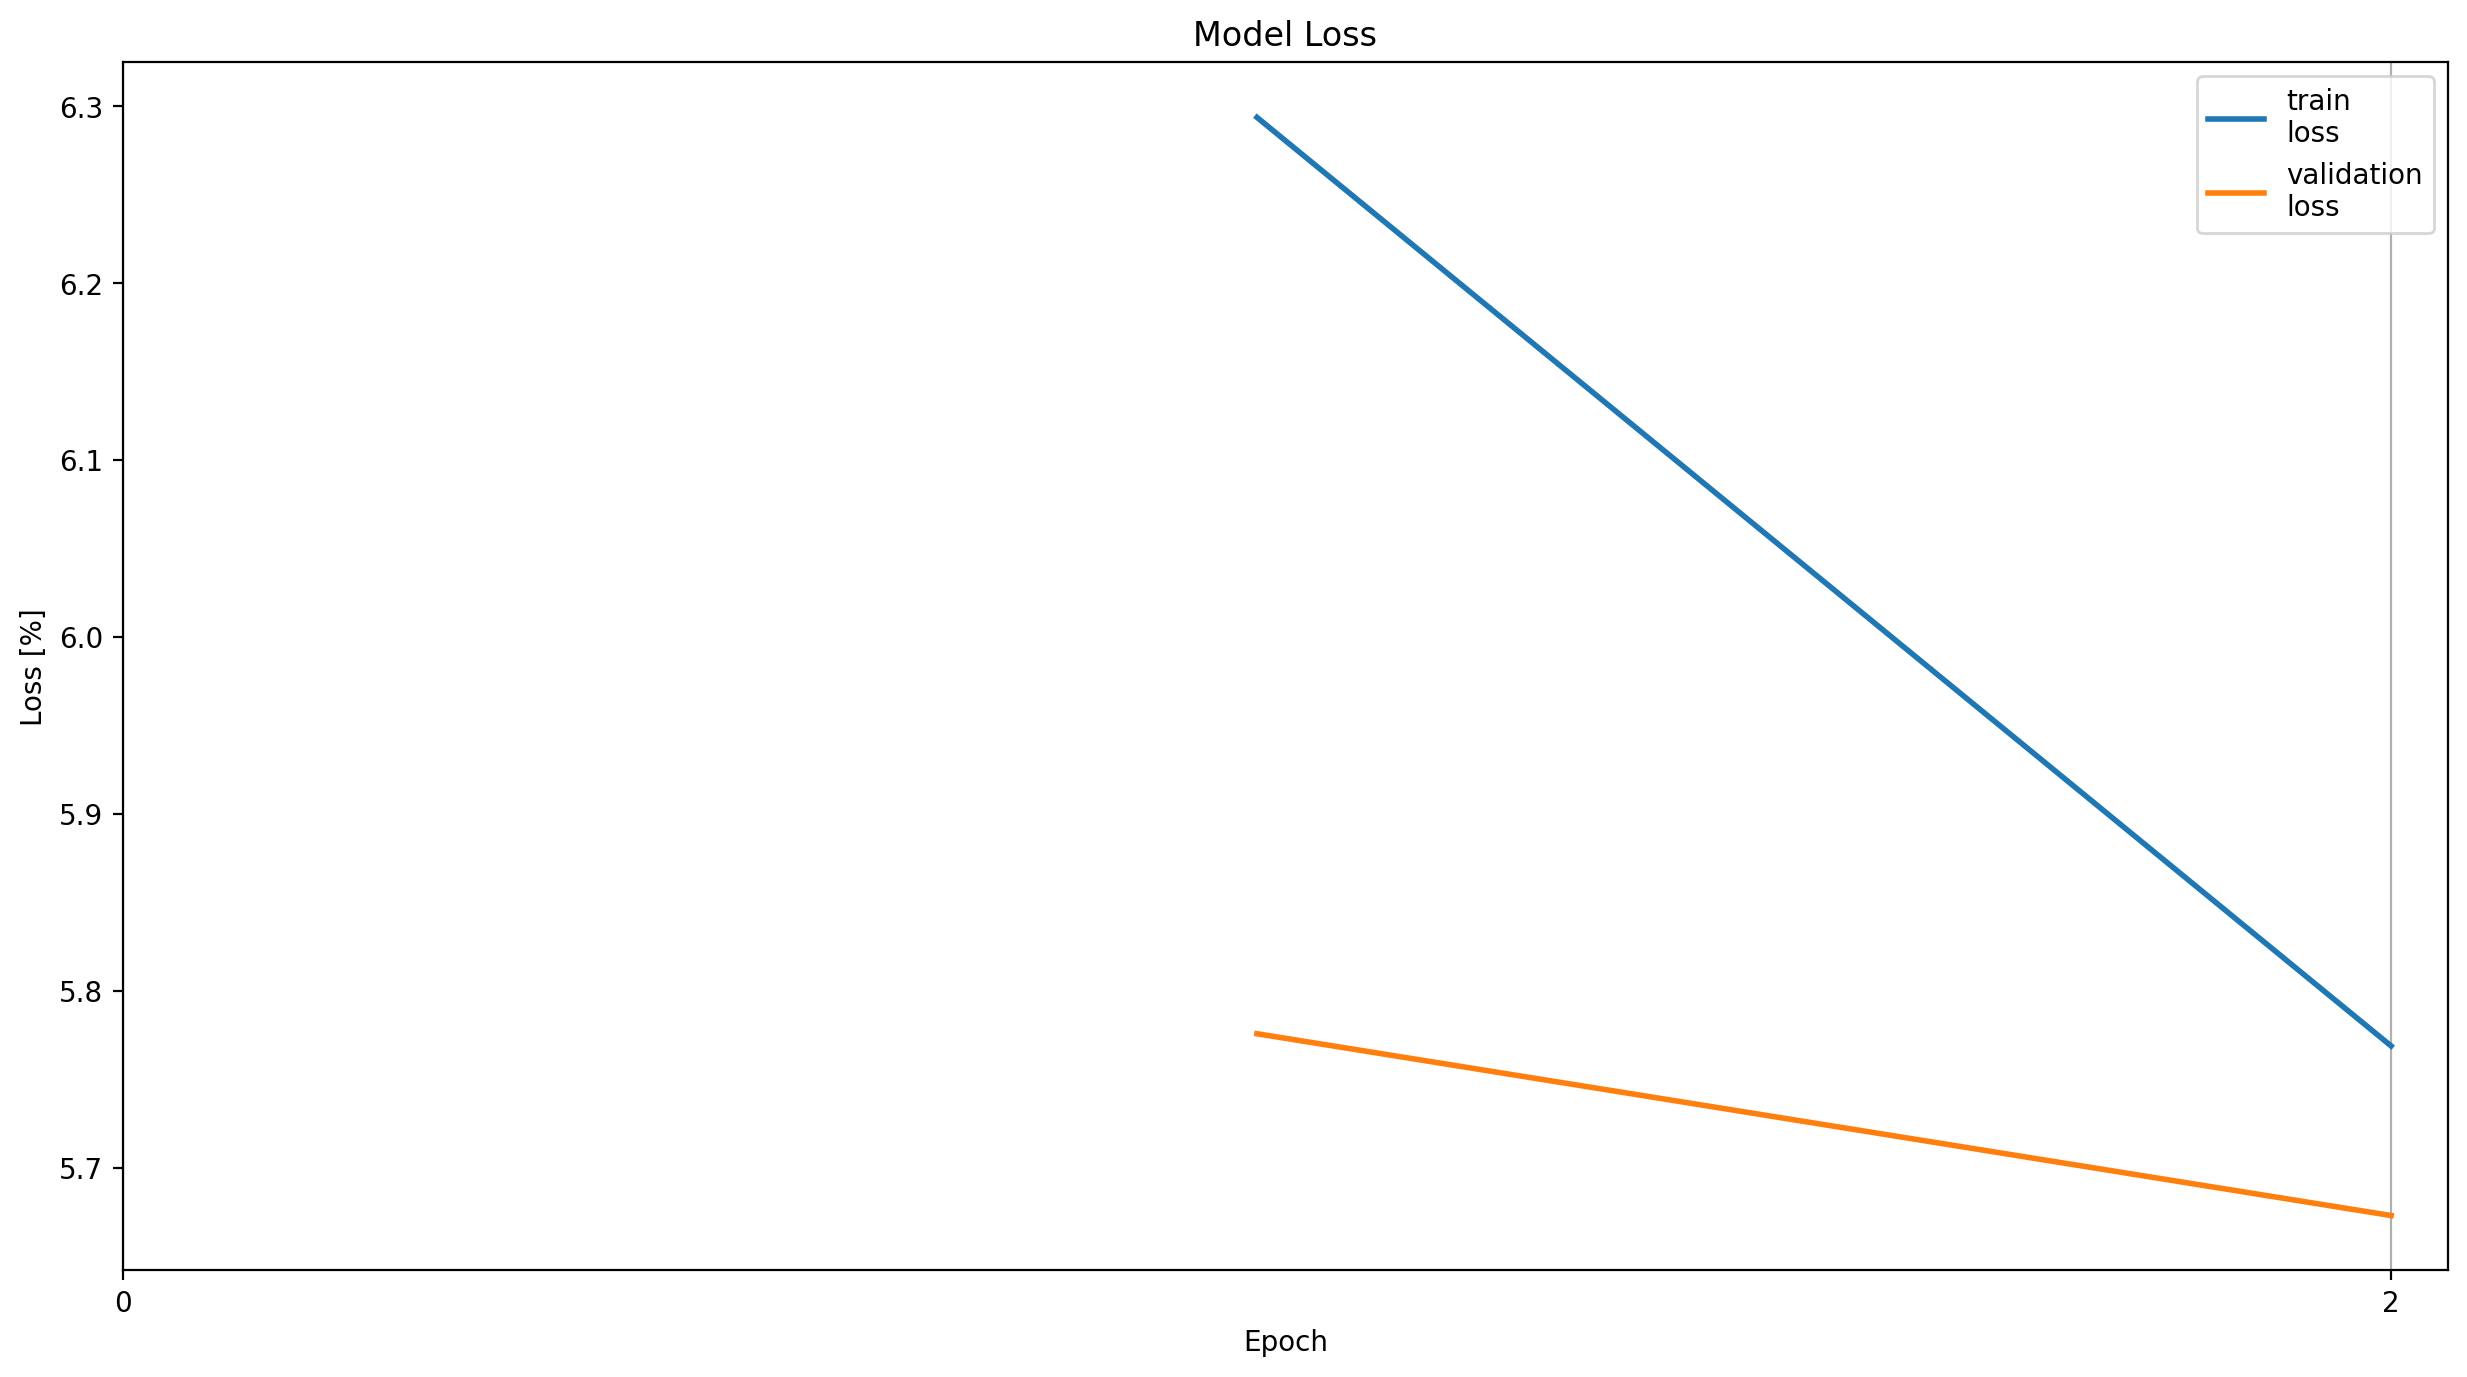

In [111]:
fig, ax = plt.subplots(1, 1, figsize=(15,8), dpi=200)
fig.patch.set_facecolor('white')

# plot accuracy
p1 = ax.plot(logger['epochs'], logger['train_loss'], linewidth=2, label='train\nloss')
p2 = ax.plot(logger['epochs'], logger['val_loss'], linewidth=2, label='validation\nloss')
ax.set_xticks(range(0, logger['epochs'][-1] + 1, 2))
ax.set_xticklabels(range(0, logger['epochs'][-1] + 1, 2))
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss [%]')
ax.set_title('Model Loss')
ax.xaxis.grid()
ax.legend()

In [112]:
logger['train_loss']

[6.293852002450399, 5.768769531760897]

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 5  - Generate Sentences
---
Use the following function to generate 3 sentences of length 20, and print them. Do they make sense? (you can compare generated sentences over epochs, to see if some logic is gained during training).

In [66]:
def generate(model, vocab, nwords=100, temp=1.0):
    model.eval()
    ntokens = len(vocab.stoi)
    model_input = torch.randint(ntokens, (1, 1), dtype=torch.long).to(device)
    words = []
    with torch.no_grad():
        for i in range(nwords):
            output = model(model_input, None)
            word_weights = output[-1].squeeze().div(temp).exp().cpu()
            word_idx = torch.multinomial(word_weights, 1)[0]
            word_tensor = torch.Tensor([[word_idx]]).long().to(device)
            model_input = torch.cat([model_input, word_tensor], 0)
            word = vocab.itos[word_idx]
            words.append(word)
    return words

In [68]:
"""
Your code Here
"""

# load saved model
state = torch.load(f'{CHECKPOINT_DIR}/{MODEL_NAME}_{7}.pth', map_location=device)
best_model = TransformerModel(state['ntokens'], 
                              state['emsize'], 
                              state['nhead'], 
                              state['nhid'], 
                              state['nlayers'], 
                              state['dropout']).to(device)

best_model.load_state_dict(state['model'])

nsentences = 3 # Number of sentences to generate

for i in range(nsentences):
  sentence = generate(best_model, vocab, nwords=20)
  print(f'Sentence {i}:')
  print(" ".join(sentence), '\n')    

Sentence 0:
and scleroderma and power ( to ice protection involving an increasingly avalanche ) is found , surface eagle <unk> <unk> 

Sentence 1:
<unk> , duchess were registered . it remained over the power . it is recorded by an american national contractor 

Sentence 2:
ad minorities and destroyed of the number and ernie who lived in wisconsin and interstate and sports and the largest 



## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons made by <a href="https://www.flaticon.com/authors/becris" title="Becris">Becris</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a>
* Icons from <a href="https://icons8.com/">Icons8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/